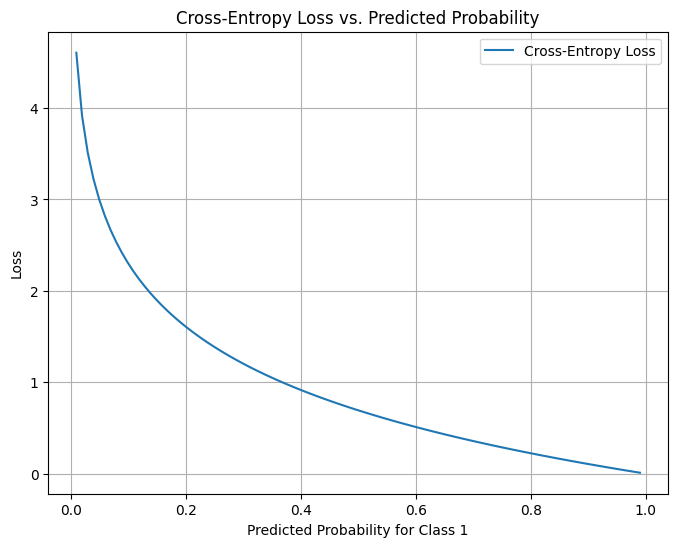

In [2]:

import matplotlib
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np
import math
import preprocessing
import convolution
import relu
import maxpool
import fullyConnectedLayer
import softmax
import crossEntropy
import os

In [2]:
# This function preprocesses the image by grayscaling and resizing the given input image
# img is an image path
def preprocess(img):
    input = plt.imread(img) # turn the image path into an array with matplotlib

    if input.ndim != 3: # check the number of dimensions of the array is expected value 3. The case we anticipate is a grayscale image where the array has only 2 dimensions
        return None # return None to signal the preprocessing step as failed for this image

    grayscaled_img = preprocessing.grayscale(input) # call the grayscale function in the preprocessing file
    resized_img = preprocessing.resize_img(grayscaled_img,64) # call the resizing function in the preprocessing file
    return resized_img # return the preprocessed image

In [3]:
def initialize():
    # Layer 1
    global conv1_filter1
    global conv1_filter2
    global conv1_filter3
    global conv1_filter4
    global relu1_1
    global relu1_2
    global relu1_3
    global relu1_4

    # Layer 2
    global conv2_filter1
    global conv2_filter2
    global conv2_filter3
    global conv2_filter4
    global relu2_1 
    global relu2_2 
    global relu2_3 
    global relu2_4
    global maxpool1_1
    global maxpool1_2
    global maxpool1_3 
    global maxpool1_4

    # Layer 3
    global conv3_filter1
    global conv3_filter2
    global conv3_filter3
    global conv3_filter4
    global relu3_1 
    global relu3_2 
    global relu3_3 
    global relu3_4
    
    #  Later 4
    global conv4_filter1
    global conv4_filter2
    global conv4_filter3
    global conv4_filter4
    global relu4_1 
    global relu4_2 
    global relu4_3 
    global relu4_4 
    global maxpool2_1
    global maxpool2_2
    global maxpool2_3 
    global maxpool2_4 
    # FCL
    global fcl_layer
    # Softmax
    global soft_max
    
    ## Layer 1
    # convolution 1
    conv1_filter1 = convolution.convolution_layer()
    conv1_filter2 = convolution.convolution_layer()
    conv1_filter3 = convolution.convolution_layer()
    conv1_filter4 = convolution.convolution_layer()
    # relu 1 
    relu1_1 = relu.relu()
    relu1_2 = relu.relu()
    relu1_3 = relu.relu()
    relu1_4 = relu.relu()

    ## Layer 2
    # convolution 2
    conv2_filter1 = convolution.convolution_layer()
    conv2_filter2 = convolution.convolution_layer()
    conv2_filter3 = convolution.convolution_layer()
    conv2_filter4 = convolution.convolution_layer()
    #   Relu 2
    relu2_1 = relu.relu()
    relu2_2 = relu.relu()
    relu2_3 = relu.relu()
    relu2_4 = relu.relu()
    #   Maxpool 1
    maxpool1_1 = maxpool.max_pool()
    maxpool1_2 = maxpool.max_pool()
    maxpool1_3 = maxpool.max_pool()
    maxpool1_4 = maxpool.max_pool()

    ## Layer 3
    # convolution 3
    conv3_filter1 = convolution.convolution_layer()
    conv3_filter2 = convolution.convolution_layer()
    conv3_filter3 = convolution.convolution_layer()
    conv3_filter4 = convolution.convolution_layer()
    #   Relu 3
    relu3_1 = relu.relu()
    relu3_2 = relu.relu()
    relu3_3 = relu.relu()
    relu3_4 = relu.relu()
    ## Layer 4
    # convolution 4
    conv4_filter1 = convolution.convolution_layer()
    conv4_filter2 = convolution.convolution_layer()
    conv4_filter3 = convolution.convolution_layer()
    conv4_filter4 = convolution.convolution_layer()
    #   Relu 4
    relu4_1 = relu.relu()
    relu4_2 = relu.relu()
    relu4_3 = relu.relu()
    relu4_4 = relu.relu()
    
    #   Maxpooling 2
    maxpool2_1 = maxpool.max_pool()
    maxpool2_2 = maxpool.max_pool()
    maxpool2_3 = maxpool.max_pool()
    maxpool2_4 = maxpool.max_pool()
    
    #   fullyconnectedLayer
    #   Column concadenation
    output_size = 3
    input_size = 400
    fcl_layer = fullyConnectedLayer.fully_connected_layer(output_size, input_size)

    #   Softmax
    soft_max = softmax.softmax()

In [4]:
def forward(img, y_true):
    # global Variable declaration
    # Layer conv1_filter4
    # Layer 1
    global conv1_filter1
    global conv1_filter2
    global conv1_filter3
    global conv1_filter4
    global relu1_1
    global relu1_2
    global relu1_3
    global relu1_4

    # Layer 2
    global conv2_filter1
    global conv2_filter2
    global conv2_filter3
    global conv2_filter4
    global relu2_1 
    global relu2_2 
    global relu2_3 
    global relu2_4
    global maxpool1_1
    global maxpool1_2
    global maxpool1_3 
    global maxpool1_4

    # Layer 3
    global conv3_filter1
    global conv3_filter2
    global conv3_filter3
    global conv3_filter4
    global relu3_1 
    global relu3_2 
    global relu3_3 
    global relu3_4
    
    #  Later 4
    global conv4_filter1
    global conv4_filter2
    global conv4_filter3
    global conv4_filter4
    global relu4_1 
    global relu4_2 
    global relu4_3 
    global relu4_4 
    global maxpool2_1
    global maxpool2_2
    global maxpool2_3 
    global maxpool2_4 
    # FCL
    global fcl_layer
    # Softmax
    global soft_max
    
    # First Layer
    # Conv 1
    conv1_out1 = conv1_filter1.forward(img,0)
    conv1_out2 = conv1_filter2.forward(img,0)
    conv1_out3 = conv1_filter3.forward(img,0)
    conv1_out4 = conv1_filter4.forward(img,0)

    #  Relu 1
    relu1_out1 = relu1_1.forward(conv1_out1)
    relu1_out2 = relu1_2.forward(conv1_out2)
    relu1_out3 = relu1_3.forward(conv1_out3)
    relu1_out4 = relu1_4.forward(conv1_out4)
    
   
    #   Second Layer
    #   Conv 2
    # input image: 1st output from convolutional layer 1
    conv2_out1_1 = conv2_filter1.forward(relu1_out1,0)
    conv2_out1_2 = conv2_filter1.forward(relu1_out2,1)
    conv2_out1_3 = conv2_filter1.forward(relu1_out3,2)
    conv2_out1_4 = conv2_filter1.forward(relu1_out4,3)
    # input image: 2nd maxpool output from convolutional layer 1
    conv2_out2_1 = conv2_filter2.forward(relu1_out1,0)
    conv2_out2_2 = conv2_filter2.forward(relu1_out2,1)
    conv2_out2_3 = conv2_filter2.forward(relu1_out3,2)
    conv2_out2_4 = conv2_filter2.forward(relu1_out4,3)
    # input image: 3rd maxpool output from convolutional layer 1
    conv2_out3_1 = conv2_filter3.forward(relu1_out1,0)
    conv2_out3_2 = conv2_filter3.forward(relu1_out2,1)
    conv2_out3_3 = conv2_filter3.forward(relu1_out3,2)
    conv2_out3_4 = conv2_filter3.forward(relu1_out4,3)
    # input image: 4th maxpool output from convolutional layer 1
    conv2_out4_1 = conv2_filter4.forward(relu1_out1,0)
    conv2_out4_2 = conv2_filter4.forward(relu1_out2,1)
    conv2_out4_3 = conv2_filter4.forward(relu1_out3,2)
    conv2_out4_4 = conv2_filter4.forward(relu1_out4,3)
    
    conv2_out1_a = np.add(conv2_out1_1, conv2_out1_2) 
    conv2_out1_b = np.add(conv2_out1_3, conv2_out1_4)
    conv2_out1 = np.add(conv2_out1_a,conv2_out1_b)
   
    conv2_out2_a = np.add(conv2_out2_1, conv2_out2_2) 
    conv2_out2_b = np.add(conv2_out2_3, conv2_out2_4)
    conv2_out2 = np.add(conv2_out2_a,conv2_out2_b)
    
    conv2_out3_a = np.add(conv2_out3_1, conv2_out3_2) 
    conv2_out3_b = np.add(conv2_out3_3, conv2_out3_4)
    conv2_out3 = np.add(conv2_out3_a, conv2_out3_b)
    
    conv2_out4_a = np.add(conv2_out4_1, conv2_out4_2) 
    conv2_out4_b = np.add(conv2_out4_3, conv2_out4_4)
    conv2_out4 = np.add(conv2_out4_a,conv2_out4_b)
    
    
    #   Relu 2
    relu2_out1 = relu2_1.forward(conv2_out1)
    relu2_out2 = relu2_2.forward(conv2_out2)
    relu2_out3 = relu2_3.forward(conv2_out3)
    relu2_out4 = relu2_4.forward(conv2_out4)
    
    # Maxpool 1
    maxpool1_out1 = maxpool1_1.forward(relu2_out1)
    maxpool1_out2 = maxpool1_2.forward(relu2_out2)
    maxpool1_out3 = maxpool1_3.forward(relu2_out3)
    maxpool1_out4 = maxpool1_4.forward(relu2_out4)

    #   Third Layer
    #   Conv 3
    #  input image:  2nd maxpool output from convolutional layer 1
    conv3_out1_1 = conv3_filter1.forward(maxpool1_out1,0)
    conv3_out1_2 = conv3_filter1.forward(maxpool1_out2,1)
    conv3_out1_3 = conv3_filter1.forward(maxpool1_out3,2)
    conv3_out1_4 = conv3_filter1.forward(maxpool1_out4,3)
    # input image: 2nd maxpool output from convolutional layer 1
    conv3_out2_1 = conv3_filter2.forward(maxpool1_out1,0)
    conv3_out2_2 = conv3_filter2.forward(maxpool1_out2,1)
    conv3_out2_3 = conv3_filter2.forward(maxpool1_out3,2)
    conv3_out2_4 = conv3_filter2.forward(maxpool1_out4,3)
    # input image: 3rd maxpool output from convolutional layer 1
    conv3_out3_1 = conv3_filter3.forward(maxpool1_out1,0)
    conv3_out3_2 = conv3_filter3.forward(maxpool1_out2,1)
    conv3_out3_3 = conv3_filter3.forward(maxpool1_out3,2)
    conv3_out3_4 = conv3_filter3.forward(maxpool1_out4,3)
    # input image: 4th maxpool output from convolutio3al layer 1
    conv3_out4_1 = conv3_filter4.forward(maxpool1_out1,0)
    conv3_out4_2 = conv3_filter4.forward(maxpool1_out2,1)
    conv3_out4_3 = conv3_filter4.forward(maxpool1_out3,2)
    conv3_out4_4 = conv3_filter4.forward(maxpool1_out4,3)
    
    conv3_out1_a = np.add(conv3_out1_1, conv3_out1_2) 
    conv3_out1_b = np.add(conv3_out1_3, conv3_out1_4)
    conv3_out1 = np.add(conv3_out1_a,conv3_out1_b)
    conv3_out2_a = np.add(conv3_out2_1, conv3_out2_2) 
    conv3_out2_b = np.add(conv3_out2_3, conv3_out2_4)
    conv3_out2 = np.add(conv3_out2_a,conv3_out2_b)
    conv3_out3_a = np.add(conv3_out3_1, conv3_out3_2) 
    conv3_out3_b = np.add(conv3_out3_3, conv3_out3_4)
    conv3_out3 = np.add(conv3_out3_a, conv3_out3_b)
    
    conv3_out4_a = np.add(conv3_out4_1, conv3_out4_2) 
    conv3_out4_b = np.add(conv3_out4_3, conv3_out4_4)
    conv3_out4 = np.add(conv3_out4_a,conv3_out4_b)

    # Relu 3
    
    relu3_out1 = relu3_1.forward(conv3_out1)
    relu3_out2 = relu3_2.forward(conv3_out2)
    relu3_out3 = relu3_3.forward(conv3_out3)
    relu3_out4 = relu3_4.forward(conv3_out4)

    # Convolution Layer 4
    conv4_out1_1 = conv4_filter1.forward(relu3_out1,0)
    conv4_out1_2 = conv4_filter1.forward(relu3_out2,1)
    conv4_out1_3 = conv4_filter1.forward(relu3_out3,2)
    conv4_out1_4 = conv4_filter1.forward(relu3_out4,3)
    # input image: 2nd maxpool output from convolutional layer 1
    conv4_out2_1 = conv4_filter2.forward(relu3_out1,0)
    conv4_out2_2 = conv4_filter2.forward(relu3_out2,1)
    conv4_out2_3 = conv4_filter2.forward(relu3_out3,2)
    conv4_out2_4 = conv4_filter2.forward(relu3_out4,3)
    # input image: 3rd maxpool output from convolutional layer 1
    conv4_out3_1 = conv4_filter3.forward(relu3_out1,0)
    conv4_out3_2 = conv4_filter3.forward(relu3_out2,1)
    conv4_out3_3 = conv4_filter3.forward(relu3_out3,2)
    conv4_out3_4 = conv4_filter3.forward(relu3_out4,3)
    # input image: 4th maxpool output from convolutio3al layer 1
    conv4_out4_1 = conv4_filter4.forward(relu3_out1,0)
    conv4_out4_2 = conv4_filter4.forward(relu3_out2,1)
    conv4_out4_3 = conv4_filter4.forward(relu3_out3,2)
    conv4_out4_4 = conv4_filter4.forward(relu3_out4,3)
    
    conv4_out1_a = np.add(conv4_out1_1, conv4_out1_2) 
    conv4_out1_b = np.add(conv4_out1_3, conv4_out1_4)
    conv4_out1 = np.add(conv4_out1_a,conv4_out1_b)
    conv4_out2_a = np.add(conv4_out2_1, conv4_out2_2) 
    conv4_out2_b = np.add(conv4_out2_3, conv4_out2_4)
    conv4_out2 = np.add(conv4_out2_a,conv4_out2_b)
    conv4_out3_a = np.add(conv4_out3_1, conv4_out3_2) 
    conv4_out3_b = np.add(conv4_out3_3, conv4_out3_4)
    conv4_out3 = np.add(conv4_out3_a, conv4_out3_b)
    
    conv4_out4_a = np.add(conv4_out4_1, conv4_out4_2) 
    conv4_out4_b = np.add(conv4_out4_3, conv4_out4_4)
    conv4_out4 = np.add(conv4_out4_a,conv4_out4_b)

    # Relu 4
    relu4_out1 = relu4_1.forward(conv4_out1)
    relu4_out2 = relu4_2.forward(conv4_out2)
    relu4_out3 = relu4_3.forward(conv4_out3)
    relu4_out4 = relu4_4.forward(conv4_out4)
    #   Maxpool 2
    maxpool2_out1 = maxpool2_1.forward(relu4_out1)
    maxpool2_out2 = maxpool2_2.forward(relu4_out2)
    maxpool2_out3 = maxpool2_3.forward(relu4_out3)
    maxpool2_out4 = maxpool2_4.forward(relu4_out4)
    
    #   fullyconnectedLayer
    #   Column concadenation
    maxpool_ls_1 = maxpool2_out1.flatten()
    maxpool_ls_1 = maxpool_ls_1.tolist()
    maxpool_ls_2 = maxpool2_out2.flatten()
    maxpool_ls_2 = maxpool_ls_2.tolist()
    maxpool_ls_3 = maxpool2_out3.flatten()
    maxpool_ls_3 = maxpool_ls_3.tolist()
    maxpool_ls_4 = maxpool2_out4.flatten()
    maxpool_ls_4 = maxpool_ls_4.tolist()
    fcl_input = maxpool_ls_1 + maxpool_ls_2 + maxpool_ls_3 + maxpool_ls_4
    
    fcl_output = fcl_layer.forward(fcl_input)

    #   Softmax
    soft_output = soft_max.forward(fcl_output)
    
    # Cross Entropy
    loss = crossEntropy.cross_entropy_loss(y_true,soft_output)
    return loss, soft_output

In [5]:
def backward(y_true, learning_rate):
    # global Variable declaration
    # Layer 1
    global conv1_filter1
    global conv1_filter2
    global conv1_filter3
    global conv1_filter4
    global relu1_1
    global relu1_2
    global relu1_3
    global relu1_4

    # Layer 2
    global conv2_filter1
    global conv2_filter2
    global conv2_filter3
    global conv2_filter4
    global relu2_1 
    global relu2_2 
    global relu2_3 
    global relu2_4
    global maxpool1_1
    global maxpool1_2
    global maxpool1_3 
    global maxpool1_4

    # Layer 3
    global conv3_filter1
    global conv3_filter2
    global conv3_filter3
    global conv3_filter4
    global relu3_1 
    global relu3_2 
    global relu3_3 
    global relu3_4
    
    #  Later 4
    global conv4_filter1
    global conv4_filter2
    global conv4_filter3
    global conv4_filter4
    global relu4_1 
    global relu4_2 
    global relu4_3 
    global relu4_4 
    global maxpool2_1
    global maxpool2_2
    global maxpool2_3 
    global maxpool2_4 
    # FCL
    global fcl_layer
    # Softmax
    global soft_max
    #   Softmax
    softmax_back = soft_max.backward(y_true)

    #   Fully Connected Layer
    fcl_back = fcl_layer.backward(learning_rate, softmax_back)
    
    #   Maxpool 2
    maxpool2_back_1 = maxpool2_1.backward(fcl_back[0:100].reshape(10,10))
    maxpool2_back_2 = maxpool2_2.backward(fcl_back[100:200].reshape(10,10))
    maxpool2_back_3 = maxpool2_3.backward(fcl_back[200:300].reshape(10,10))
    maxpool2_back_4 = maxpool2_4.backward(fcl_back[300:400].reshape(10,10))
    #   Relu 4
    relu4_back1 = relu4_1.backward(maxpool2_back_1)
    relu4_back2 = relu4_2.backward(maxpool2_back_2)
    relu4_back3 = relu4_3.backward(maxpool2_back_3)
    relu4_back4 = relu4_4.backward(maxpool2_back_4)
    
    #   Conv 4
    conv4_out1_back1 = conv4_filter1.backward(relu4_back1,learning_rate,0)
    conv4_out1_back2 = conv4_filter1.backward(relu4_back1,learning_rate,1)
    conv4_out1_back3 = conv4_filter1.backward(relu4_back1,learning_rate,2)
    conv4_out1_back4 = conv4_filter1.backward(relu4_back1,learning_rate,3)
    conv4_out1_back = conv4_out1_back1 + conv4_out1_back2 + conv4_out1_back3 + conv4_out1_back4
    
    conv4_out2_back1 = conv4_filter2.backward(relu4_back2,learning_rate,0)
    conv4_out2_back2 = conv4_filter2.backward(relu4_back2,learning_rate,1)
    conv4_out2_back3 = conv4_filter2.backward(relu4_back2,learning_rate,2)
    conv4_out2_back4 = conv4_filter2.backward(relu4_back2,learning_rate,3)
    conv4_out2_back = conv4_out2_back1 + conv4_out2_back2 + conv4_out2_back3 + conv4_out2_back4
    
    conv4_out3_back1 = conv4_filter3.backward(relu4_back3,learning_rate,0)
    conv4_out3_back2 = conv4_filter3.backward(relu4_back3,learning_rate,1)
    conv4_out3_back3 = conv4_filter3.backward(relu4_back3,learning_rate,2)
    conv4_out3_back4 = conv4_filter3.backward(relu4_back3,learning_rate,3)
    conv4_out3_back = conv4_out3_back1 + conv4_out3_back2 + conv4_out3_back3 + conv4_out3_back4
    
    conv4_out4_back1 = conv4_filter4.backward(relu4_back4,learning_rate,0)
    conv4_out4_back2 = conv4_filter4.backward(relu4_back4,learning_rate,1)
    conv4_out4_back3 = conv4_filter4.backward(relu4_back4,learning_rate,2)
    conv4_out4_back4 = conv4_filter4.backward(relu4_back4,learning_rate,3)
    conv4_out4_back = conv4_out4_back1 + conv4_out4_back2 + conv4_out4_back3 + conv4_out4_back4
    

    #   Relu 3
    relu3_back1 = relu3_1.backward(conv4_out1_back)
    relu3_back2 = relu3_2.backward(conv4_out2_back)
    relu3_back3 = relu3_3.backward(conv4_out3_back)
    relu3_back4 = relu3_4.backward(conv4_out4_back)
    
    #   Conv 3
    conv3_out1_back1 = conv3_filter1.backward(relu3_back1,learning_rate,0)
    conv3_out1_back2 = conv3_filter1.backward(relu3_back1,learning_rate,1)
    conv3_out1_back3 = conv3_filter1.backward(relu3_back1,learning_rate,2)
    conv3_out1_back4 = conv3_filter1.backward(relu3_back1,learning_rate,3)
    conv3_out1_back = conv3_out1_back1 + conv3_out1_back2 + conv3_out1_back3 + conv3_out1_back4
    
    conv3_out2_back1 = conv3_filter2.backward(relu3_back2,learning_rate,0)
    conv3_out2_back2 = conv3_filter2.backward(relu3_back2,learning_rate,1)
    conv3_out2_back3 = conv3_filter2.backward(relu3_back2,learning_rate,2)
    conv3_out2_back4 = conv3_filter2.backward(relu3_back2,learning_rate,3)
    conv3_out2_back = conv3_out2_back1 + conv3_out2_back2 + conv3_out2_back3 + conv3_out2_back4
    
    conv3_out3_back1 = conv3_filter3.backward(relu3_back3,learning_rate,0)
    conv3_out3_back2 = conv3_filter3.backward(relu3_back3,learning_rate,1)
    conv3_out3_back3 = conv3_filter3.backward(relu3_back3,learning_rate,2)
    conv3_out3_back4 = conv3_filter3.backward(relu3_back3,learning_rate,3)
    conv3_out3_back = conv3_out3_back1 + conv3_out3_back2 + conv3_out3_back3 + conv3_out3_back4
    
    conv3_out4_back1 = conv3_filter4.backward(relu3_back4,learning_rate,0)
    conv3_out4_back2 = conv3_filter4.backward(relu3_back4,learning_rate,1)
    conv3_out4_back3 = conv3_filter4.backward(relu3_back4,learning_rate,2)
    conv3_out4_back4 = conv3_filter4.backward(relu3_back4,learning_rate,3)
    conv3_out4_back = conv3_out4_back1 + conv3_out4_back2 + conv3_out4_back3 + conv3_out4_back4

    #   Maxpool 1
    maxpool1_back_1 = maxpool1_1.backward(conv3_out1_back)
    maxpool1_back_2 = maxpool1_2.backward(conv3_out2_back)
    maxpool1_back_3 = maxpool1_3.backward(conv3_out3_back)
    maxpool1_back_4 = maxpool1_4.backward(conv3_out4_back)
    #   Relu 2
    relu2_back1 = relu2_1.backward(maxpool1_back_1)
    relu2_back2 = relu2_2.backward(maxpool1_back_2)
    relu2_back3 = relu2_3.backward(maxpool1_back_3)
    relu2_back4 = relu2_4.backward(maxpool1_back_4)
    #   Conv 2
    conv2_out1_back1 = conv2_filter1.backward(relu2_back1,learning_rate,0)
    conv2_out1_back2 = conv2_filter1.backward(relu2_back1,learning_rate,1)
    conv2_out1_back3 = conv2_filter1.backward(relu2_back1,learning_rate,2)
    conv2_out1_back4 = conv2_filter1.backward(relu2_back1,learning_rate,3)
    conv2_out1_back = conv2_out1_back1 + conv2_out1_back2 + conv2_out1_back3 + conv2_out1_back4
    
    conv2_out2_back1 = conv2_filter2.backward(relu2_back2,learning_rate,0)
    conv2_out2_back2 = conv2_filter2.backward(relu2_back2,learning_rate,1)
    conv2_out2_back3 = conv2_filter2.backward(relu2_back2,learning_rate,2)
    conv2_out2_back4 = conv2_filter2.backward(relu2_back2,learning_rate,3)
    conv2_out2_back = conv2_out2_back1 + conv2_out2_back2 + conv2_out2_back3 + conv2_out2_back4
    
    conv2_out3_back1 = conv2_filter3.backward(relu2_back3,learning_rate,0)
    conv2_out3_back2 = conv2_filter3.backward(relu2_back3,learning_rate,1)
    conv2_out3_back3 = conv2_filter3.backward(relu2_back3,learning_rate,2)
    conv2_out3_back4 = conv2_filter3.backward(relu2_back3,learning_rate,3)
    conv2_out3_back = conv2_out3_back1 + conv2_out3_back2 + conv2_out3_back3 + conv2_out3_back4
    
    conv2_out4_back1 = conv2_filter4.backward(relu2_back4,learning_rate,0)
    conv2_out4_back2 = conv2_filter4.backward(relu2_back4,learning_rate,1)
    conv2_out4_back3 = conv2_filter4.backward(relu2_back4,learning_rate,2)
    conv2_out4_back4 = conv2_filter4.backward(relu2_back4,learning_rate,3)
    conv2_out4_back = conv2_out4_back1 + conv2_out4_back2 + conv2_out4_back3 + conv2_out4_back4
    
    
    #   Relu 1
    relu1_back1 = relu1_1.backward(conv2_out1_back)
    relu1_back2 = relu1_2.backward(conv2_out2_back)
    relu1_back3 = relu1_3.backward(conv2_out3_back)
    relu1_back4 = relu1_4.backward(conv2_out4_back)
    

    #   Conv 1
    conv1_out1 = conv1_filter1.backward(relu1_back1,learning_rate,0)
    conv1_out2 = conv1_filter2.backward(relu1_back2,learning_rate,0)
    conv1_out3 = conv1_filter3.backward(relu1_back3,learning_rate,0)
    conv1_out4 = conv1_filter4.backward(relu1_back4,learning_rate,0)

In [7]:
# TEST
# images should be a list of images, in other words, a list of 2D arrays
def test(images: list, y_true: list):
    totalLoss = 0 # keeps track of accumulated loss of all images 
    totalAccurate = 0 # keeps track of accumulated number of correct predictions 
    imagesNotSkipped = 0 # keeps track of number of images not skipped. Some images will get skipped because they are greyscale
    for i in range(len(images)): # iterate through every image 
        try:
            loss, out = forward(images[i], y_true[i]) # store the loss and class probability outputs from the running forward propagation on the model
            totalLoss += loss # accumulate the loss
            predictedClass = np.argmax(out) # store the model's highest likelihood class
            trueClass = np.argmax(y_true[i]) # store the actual class
            if(predictedClass == trueClass): # compare the predicted class to the actual class
                totalAccurate+=1 # if the model predicted correctly, increment the number of correct predictions
            imagesNotSkipped+=1 # increment the number of images not skipped because the try-catch did not catch anything
        except Exception as e: # the exception we expect to catch is when the image has only 2 dimensions instead of 3 due to being greyscale
            print(e) # print the exception to help debug
    
    averageLoss = totalLoss/imagesNotSkipped # calculate the average loss from the accumulated loss and the number of images not skipped
    print(f"The loss average is: {averageLoss}") # print the average loss for debugging purposes, and to tell that the code is running
    averageAccuracy = totalAccurate/imagesNotSkipped # calculate the average accuracy from the number of accurate predictions and the number of images not skipped
    print(f"The accuracy is: {totalAccurate}/{imagesNotSkipped} = {averageAccuracy*100}%") # print the average accuracy for debugging purposes, and to tell that the code is running
    return (averageLoss, averageAccuracy) # return the average loss and accuracy, which will be used later to graph the model's performance

In [8]:
def train(images: list, y_true: list, learning_rate: float):
    totalLoss = 1 # keeps track of accumulated loss for all images 
    totalAccurate = 0 # keeps track of accumulated number of correct predictions 
    imagesNotSkipped = 0 # keeps track of number of images not skipped. Some images will get skipped because they are greyscale

    for i in range(len(images)): # Iterate through every images
        try:
            loss, out = forward(images[i], y_true[i]) # store the loss and class probability outputs from the running forward propagation on the model
            totalLoss += loss # accumulate the loss
            predictedClass = np.argmax(out) # store the model's highest likelihood class
            trueClass = np.argmax(y_true[i]) # store the actual class
            if(predictedClass == trueClass): # compare the predicted class to the actual class
                totalAccurate+=1 # if the model predicted correctly, increment the number of correct predictions
            imagesNotSkipped+=1 # increment the number of images not skipped because the try-catch did not catch anything
            
            backward(y_true[i], learning_rate) # update the model parameters according to the actual class
        except Exception as e: # the exception we expect to catch is when the image has only 2 dimensions instead of 3 due to being greyscale
            print(e) # print the exception to help debug

In [1]:
# This function shuffles the input images into a random order
def shuffleImages(huskyImages, beagleImages, goldenImages):
    huskyImages = [(image, [1, 0, 0]) for image in huskyImages] # create an array of tuples to keep image path and label paired together during shuffling
    beagleImages = [(image, [0, 1, 0]) for image in beagleImages] # create an array of tuples to keep image path and label paired together during shuffling
    goldenImages = [(image, [0, 0, 1]) for image in goldenImages] # create an array of tuples to keep image path and label paired together during shuffling
    shuffledImages = huskyImages + beagleImages + goldenImages # concatenate all all 3 of the arrays into one list of image-label tuples
    np.random.shuffle(shuffledImages) # shuffle the array of image-label tuples
    return shuffledImages # return the shuffled array of image-label tuples 

In [ ]:
# Create a list of paths to the image dataset for each dog breed
images_husky = [("../ILSVRC/Data/CLS-LOC/train/n02109961/" + f) for f in os.listdir("../ILSVRC/Data/CLS-LOC/train/n02109961")]
images_beagle = [("../ILSVRC/Data/CLS-LOC/train/n02088364/" + f) for f in os.listdir("../ILSVRC/Data/CLS-LOC/train/n02088364")] 
images_golden = [("../ILSVRC/Data/CLS-LOC/train/n02099601/" + f) for f in os.listdir("../ILSVRC/Data/CLS-LOC/train/n02099601")]

In [ ]:
# This initialize() function call is necessary to instantiate all of the variables and classes that will be called on during training and testing
initialize()

# Initialize training images and labels
shuffledTrainingImages = shuffleImages(images_husky[1:201], images_beagle[1:201], images_golden[1:201]) # shuffle the training images
trainingImages = [item[0] for item in shuffledTrainingImages] # isolate the training images into an array (array of paths to images)
trainingLabels = [item[1] for item in shuffledTrainingImages] # isolate the training labels into an array
images_train = [] # initialize a new array to store the training images. We will discard any image that fails the preprocess step. We expect this to happen for grayscale images. 
for i in trainingImages: # iterate through the training images
    iAfterPreprocessing = preprocess(i) # store the preprocessed image
    if iAfterPreprocessing is not None: # check to see if the preprocessing step failed
        images_train.append(iAfterPreprocessing) # add image to the training image array if the preprocessing step succeeded

# Initialize testing images and labels
shuffledTestingImages1 = shuffleImages(images_husky[202:402], images_beagle[202:402], images_golden[202:402]) # shuffle the testing images
testingImages1 = [item[0] for item in shuffledTestingImages1] # isolate the testing images into an array (array of paths to images)
testingLabels1 = [item[1] for item in shuffledTestingImages1] # isolate the testing images into an array
images_test1 = [] # initialize a new array to store the testing images. We will discard any image that fails the preprocess step. We expect this to happen for grayscale images. 
for i in testingImages1: # iterate through the testing images
    iAfterPreprocessing = preprocess(i) # store the preprocessed image
    if iAfterPreprocessing is not None: # check to see if the preprocessing step failed
        images_test1.append(iAfterPreprocessing) # add image to the training image array if the preprocessing step succeeded


# Initialize 2nd batch of testing images and labels
shuffledTestingImages2 = shuffleImages(images_husky[1:201], images_beagle[1:201], images_golden[1:201]) # shuffle the testing images
testingImages2 = [item[0] for item in shuffledTestingImages2] # isolate the testing images into an array (array of paths to images)
testingLabels2 = [item[1] for item in shuffledTestingImages2] # isolate the testing images into an array
images_test2 = [] # initialize a new array to store the testing images. We will discard any image that fails the preprocess step. We expect this to happen for grayscale images. 
for i in testingImages2: # iterate through the testing images
    iAfterPreprocessing = preprocess(i) # store the preprocessed image
    if iAfterPreprocessing is not None: # check to see if the preprocessing step failed
        images_test2.append(iAfterPreprocessing) # add image to the training image array if the preprocessing step succeeded


Epoch: 1/70
The loss average is: 22.910721675290947
The accuracy is: 202/600 = 33.666666666666664%
The loss average is: 22.16238152006787
The accuracy is: 215/600 = 35.833333333333336%
Epoch: 2/70
The loss average is: 22.680463165991537
The accuracy is: 206/600 = 34.333333333333336%
The loss average is: 20.32031346705721
The accuracy is: 247/600 = 41.16666666666667%
Epoch: 3/70
The loss average is: 22.680463165991537
The accuracy is: 206/600 = 34.333333333333336%
The loss average is: 21.068653600895686
The accuracy is: 234/600 = 39.0%
Epoch: 4/70
The loss average is: 23.0834155572655
The accuracy is: 199/600 = 33.166666666666664%
The loss average is: 22.335075402042428
The accuracy is: 212/600 = 35.333333333333336%
Epoch: 5/70
The loss average is: 23.02585092994065
The accuracy is: 200/600 = 33.33333333333333%
The loss average is: 23.02585092994065
The accuracy is: 200/600 = 33.33333333333333%
Epoch: 6/70
The loss average is: 21.126218228220537
The accuracy is: 233/600 = 38.83333333333

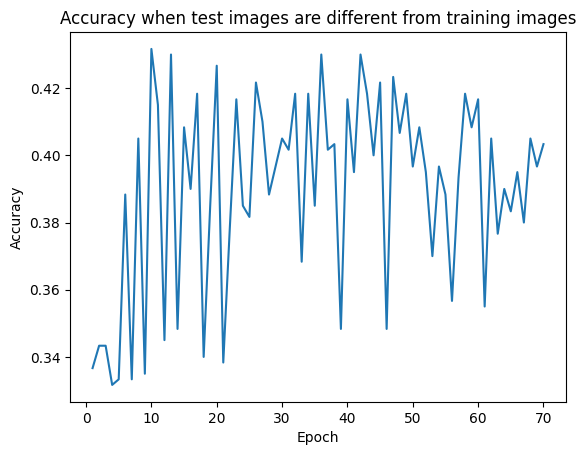

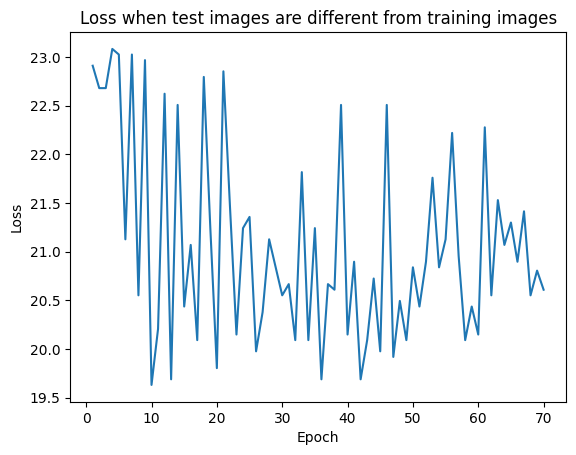

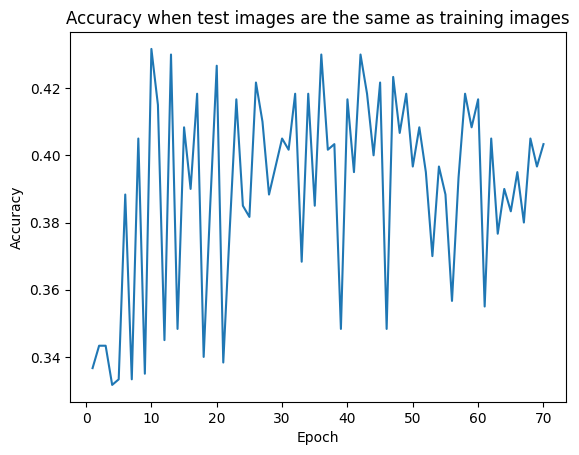

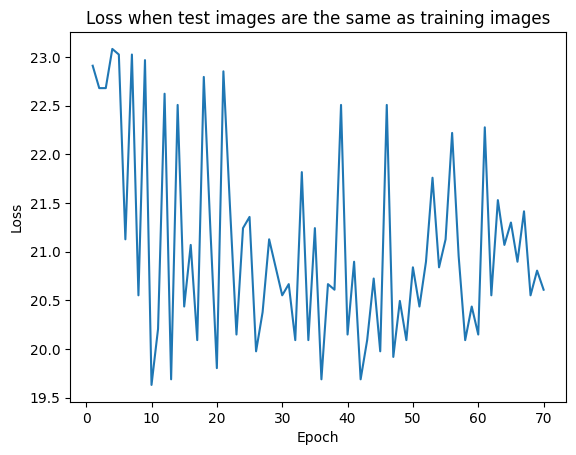

In [12]:
averageLossAfterEachEpochTest1 = [] # initialize array that tracks the average loss after each epoch when the testing set is different from the training set
averageAccuracyAfterEachEpochTest1 = [] # initialize array that tracks the average accuracy after each epoch when the testing set is different from the training set
averageLossAfterEachEpochTest2 = [] # initialize array that tracks the average loss after each epoch when the testing set is the same as the training set
averageAccuracyAfterEachEpochTest2 = [] # initialize array that tracks the average accuracy after each epoch when the testing set is the same as the training set

epochs = 70 # number of times the model will train on the training dataset (number of times the model will "see" the images)
for i in range(epochs):
    print(f"Epoch: {i+1}/{epochs}") # print epoch number for debugging purposes and to see if the code is running
    train(images_train, trainingLabels, 0.01) # train the model on the training set of images 

    # Test on different images than training images (Test 1)
    lossTest1, accuracyTest1 = test(images_test1, testingLabels1) # store the loss and accuracies of the test
    averageLossAfterEachEpochTest1.append(lossTest1) # add the loss to the associated array
    averageAccuracyAfterEachEpochTest1.append(accuracyTest1) # add the accuracy to the associated array

    # Test on same images as training images (Test 2)
    lossTest2, accuracyTest2 = test(images_test2, testingLabels2) # store the loss and accuracies of the test
    averageLossAfterEachEpochTest2.append(lossTest2) # add the loss to the associated array
    averageAccuracyAfterEachEpochTest2.append(accuracyTest2) # add the accuracy to the associated array


# Plot accuracy
plt.plot(list(range(1, len(averageAccuracyAfterEachEpochTest1) + 1)), averageAccuracyAfterEachEpochTest1, label = "test set != train set") # Plot average accuracy for each epoch for when the testing set is different from the training set
plt.plot(list(range(1, len(averageAccuracyAfterEachEpochTest2) + 1)), averageAccuracyAfterEachEpochTest2, label = "test set = train set") # Plot average accuracy for each epoch for when the testing set is the same as the training set 
plt.xlabel('Epoch') # Change the X-axis label to 'Epoch'
plt.ylabel('Accuracy') # Change the Y-axis label to 'Accuracy'
plt.legend() # show the names of each line
plt.show() # display the graph in the output

# Plot loss
plt.plot(list(range(1, len(averageLossAfterEachEpochTest1) + 1)), averageLossAfterEachEpochTest1, label = "test set != train set") #  Plot average loss over for epoch for when the testing set is different from the training set
plt.plot(list(range(1, len(averageLossAfterEachEpochTest2) + 1)), averageLossAfterEachEpochTest2, label = "test set = train set") # Plot average loss for each epoch for when the testing set is the same as the training set
plt.xlabel('Epoch') # Change the X-axis label to 'Epoch'
plt.ylabel('Loss') # Change the Y-axis label to 'Loss'
plt.legend() # show the names of each line
plt.show() # display the graph in the output
